In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [7]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [15]:
df.tail(3)

,age,sex,bmi,children,smoker,region,charges
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [19]:
df.shape

(1338, 7)

In [21]:
# check the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [23]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [43]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [45]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [57]:
for i in df.select_dtypes(include='number').columns:
    print(df[i].value_counts())
    print("****"*10)

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
****************************************
bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64
****************************************
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
****************************************
charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287

In [65]:
for i in df.select_dtypes(exclude="number").columns:
    print(df[i].value_counts())
    print("****"*10)

sex
male      676
female    662
Name: count, dtype: int64
****************************************
smoker
no     1064
yes     274
Name: count, dtype: int64
****************************************
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
****************************************


In [71]:
#statistical measure of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [69]:
df.describe(exclude='number')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [73]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [75]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

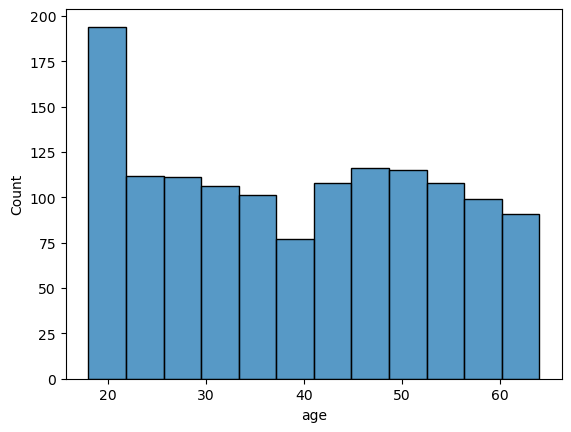

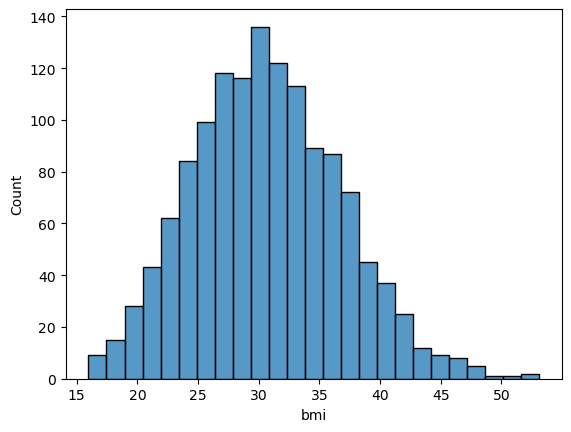

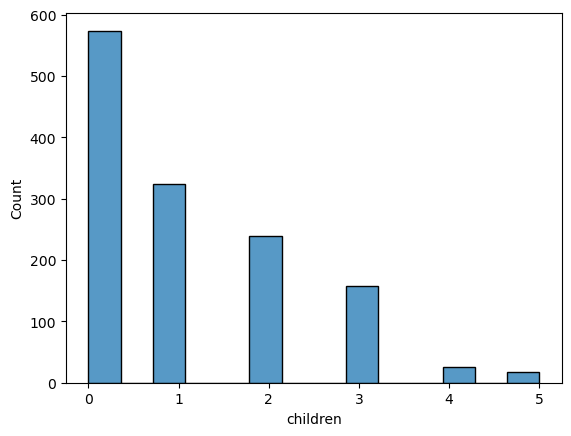

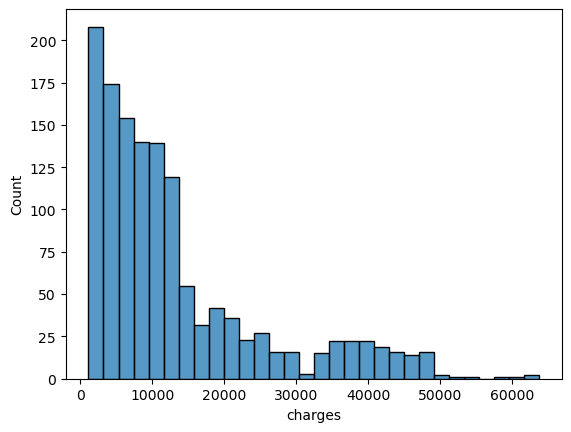

In [93]:
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()


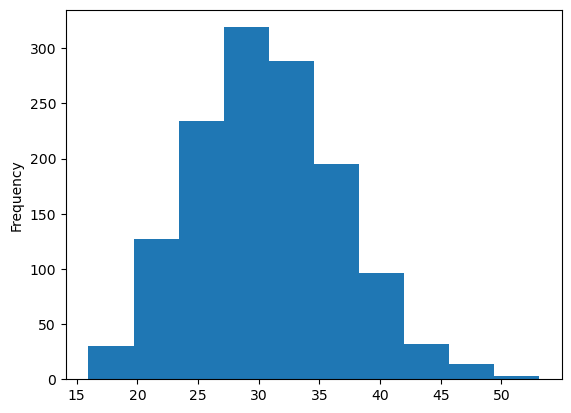

In [107]:
# is the another method  to find data in visulation
df['bmi'].plot(kind='hist')
plt.show()

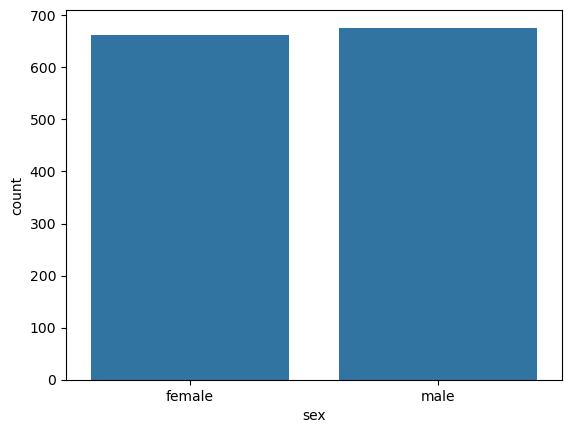

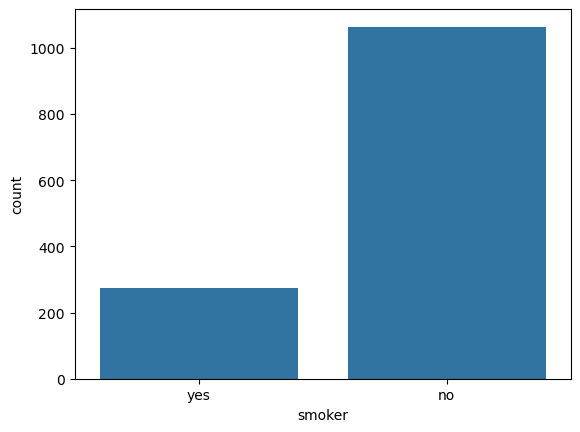

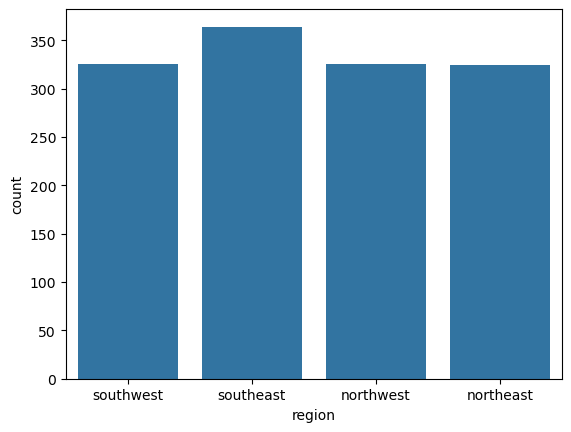

In [105]:
for i in df.select_dtypes(exclude="number").columns:
    sns.countplot(data=df,x=i)
    plt.show()

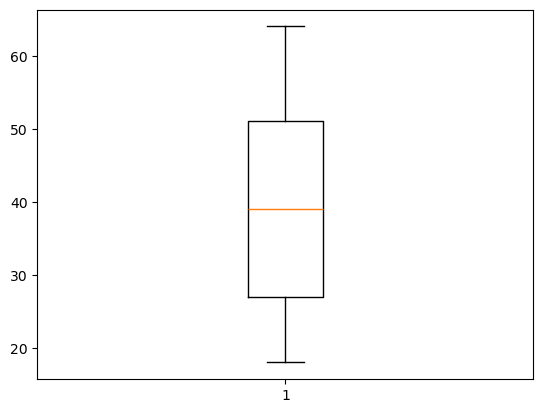

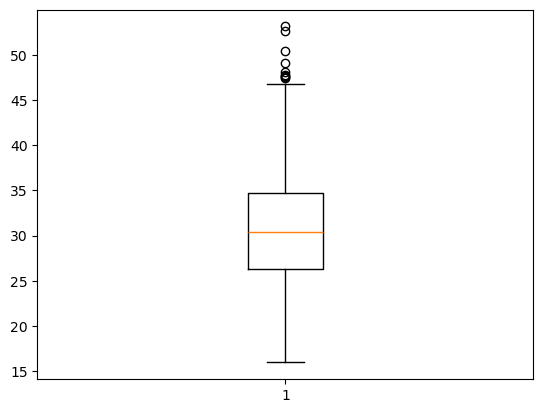

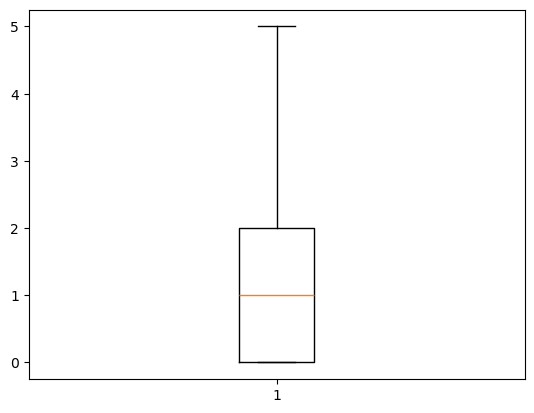

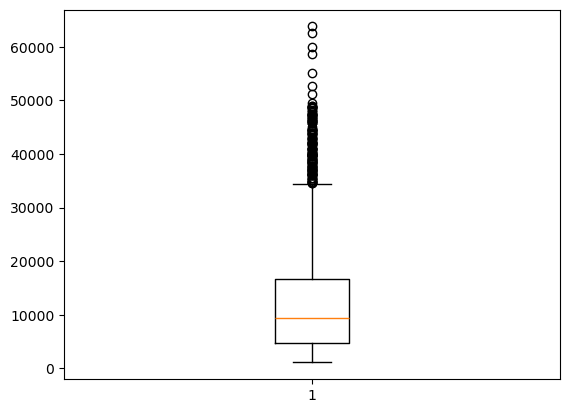

In [109]:
# we use box plot 
for i in df.select_dtypes(include="number").columns:
    plt.boxplot(data=df,x=i)
    plt.show()

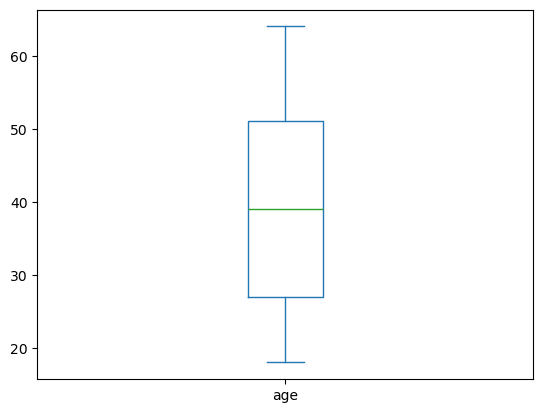

In [113]:
df["age"].plot(kind="box")
plt.show()

In [115]:
region_count=df.region.value_counts()
region_count

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

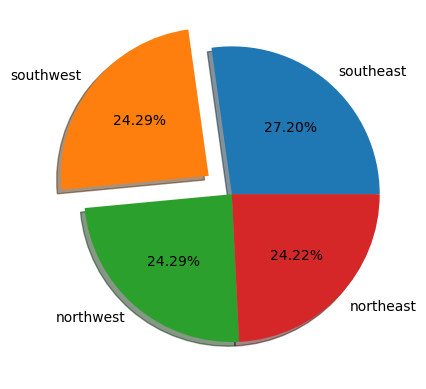

In [133]:
plt.pie(region_count,shadow=True,autopct="%0.2f%%",labels=['southeast','southwest','northwest','northeast'],explode=[0,0.2,0,0])
plt.show()

NameError: name 'plot' is not defined

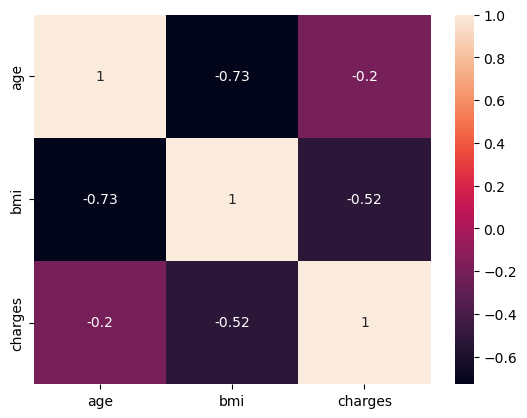

In [139]:
corr_data=df[['age','bmi','charges']].corr()
sns.heatmap(corr_data.corr(),annot=True)
plot.show()

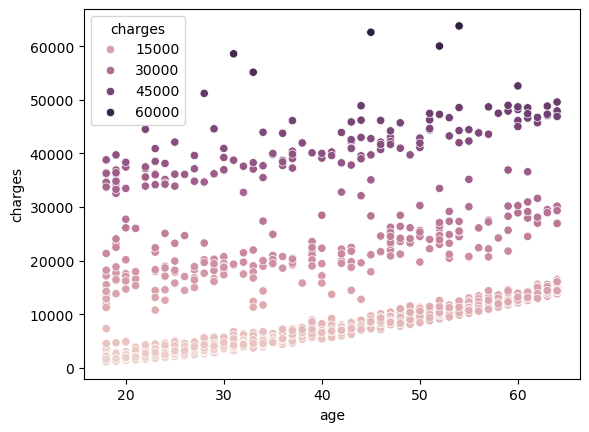

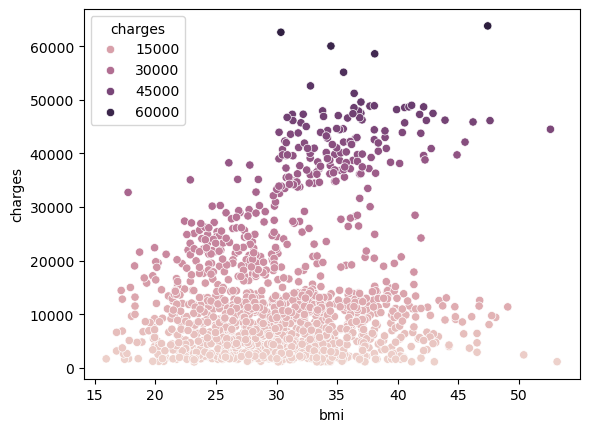

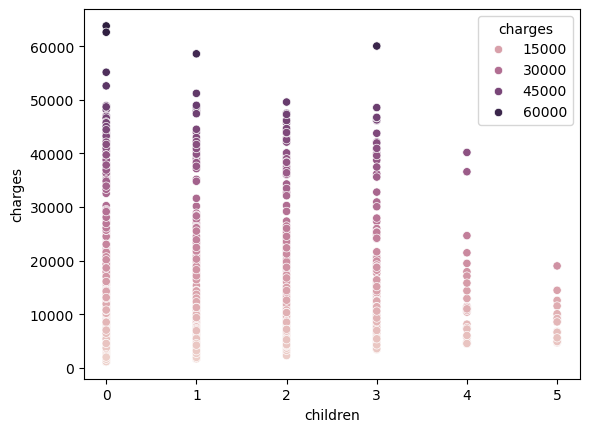

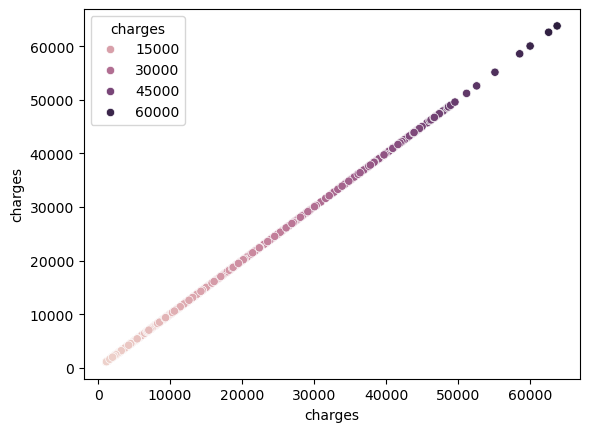

In [147]:
for i in df.select_dtypes(include="number").columns:
    sns.scatterplot(data=df,x=i,y='charges',hue="charges")
    plt.show()

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [151]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [159]:
x=df.drop(columns="sex")
y=df['sex']

In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [167]:
# Convert 'smoker' column into numeric format
df_encoded = pd.get_dummies(df, columns=['smoker'], drop_first=True)
print(df_encoded)

      age     sex     bmi  children     region      charges  smoker_yes
0      19  female  27.900         0  southwest  16884.92400        True
1      18    male  33.770         1  southeast   1725.55230       False
2      28    male  33.000         3  southeast   4449.46200       False
3      33    male  22.705         0  northwest  21984.47061       False
4      32    male  28.880         0  northwest   3866.85520       False
...   ...     ...     ...       ...        ...          ...         ...
1333   50    male  30.970         3  northwest  10600.54830       False
1334   18  female  31.920         0  northeast   2205.98080       False
1335   18  female  36.850         0  southeast   1629.83350       False
1336   21  female  25.800         0  southwest   2007.94500       False
1337   61  female  29.070         0  northwest  29141.36030        True

[1338 rows x 7 columns]


In [169]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['smoker'] = le.fit_transform(df['smoker'])
print(df)

      age     sex     bmi  children  smoker     region      charges
0      19  female  27.900         0       1  southwest  16884.92400
1      18    male  33.770         1       0  southeast   1725.55230
2      28    male  33.000         3       0  southeast   4449.46200
3      33    male  22.705         0       0  northwest  21984.47061
4      32    male  28.880         0       0  northwest   3866.85520
...   ...     ...     ...       ...     ...        ...          ...
1333   50    male  30.970         3       0  northwest  10600.54830
1334   18  female  31.920         0       0  northeast   2205.98080
1335   18  female  36.850         0       0  southeast   1629.83350
1336   21  female  25.800         0       0  southwest   2007.94500
1337   61  female  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]
